<a href="https://colab.research.google.com/github/s16497Michal/KNO/blob/main/Knowledge_representation_projekt_semestralny_Micha%C5%82_Kosi%C5%84ski_16497.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek potrzebnych do przeprowadzenia badań

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import svm, tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print(tf.__version__)

2.4.1


Załadowanie zestawu danych o ubraniach oraz wstępa obróbka do pierwszego modelu

In [32]:
fashion_mnist = tf.keras.datasets.fashion_mnist
# przygotowujemy zestawy z powyższego zbioru
(training_clothes, training_labels), (test_clothes, test_labels) = fashion_mnist.load_data()

#generowanie nagłówków 
clothes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Goat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_training = training_clothes
X_test = test_clothes
y_training = training_labels
y_test = test_labels

# dzielimy zestawy na 255 przez co uzyskamy większą skuteczność uczenia
training_clothes, test_clothes = training_clothes / 255, test_clothes / 255

Budowa pierwszej sekwencyjnej sieci do badań

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # formatowanie danych na tablice jednowymiarową
    tf.keras.layers.Dense(128, activation='relu'),  # pierwsza warstwa, posiada 128 neuronów
    tf.keras.layers.Dense(10, activation='softmax')  # druga warstwa zawierając punktację, przyporządkowującą do jednej z 10 klas
])

Kompilowanie modelu oraz trenowanie 

In [34]:
model.compile(optimizer='adam',  # aktualizacja modelu na podstawie widzianych danych i funkcji utraty
              loss='sparse_categorical_crossentropy',  # minimalizujemy funkcję utraty aby sterować modelem
              metrics=['accuracy'])  # metryka monitoruje etap uczenia i testu

# trenowanie modelu
history = model.fit(training_clothes, training_labels, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6437 - accuracy: 0.7809
Epoch 2/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3870 - accuracy: 0.8623
Epoch 3/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3431 - accuracy: 0.8747
Epoch 4/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3212 - accuracy: 0.8823
Epoch 5/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2964 - accuracy: 0.8916
Epoch 6/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2810 - accuracy: 0.8964
Epoch 7/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2642 - accuracy: 0.9022
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2544 - accuracy: 0.9060


Sprawdzenie naszej dokładności wyuczenia oraz reprezentacja na wykresie

313/313 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8706
Accuracy:  0.8705999851226807


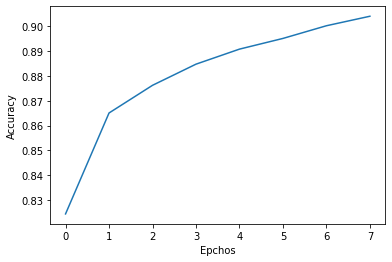

In [35]:
# ocena dokładności
test_loss, test_accuracy = model.evaluate(test_clothes, test_labels)

# przewidywanie
prediction = model.predict(test_clothes)
np.set_printoptions(suppress=True)

print('Accuracy: ', test_accuracy)
plt.plot(history.history['accuracy'])
plt.xlabel('Epchos')
plt.ylabel('Accuracy')
plt.show()

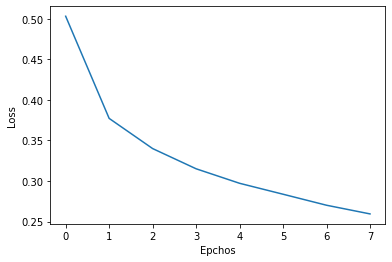

In [36]:
plt.plot(history.history['loss'])
plt.xlabel('Epchos')
plt.ylabel('Loss')
plt.show()

Podejście do rozpoznawania ubrań korzystając z klasyfikatora Support Vector Machine

Wstępna obróbka danych na 2-klasowe pasujące do modelu SVM

In [10]:
X_training_svc = X_training.reshape(60000, 784)
X_test_scv = X_test.reshape(10000, 784)

Przystosowanie zbiorów uczących oraz testowych do klasyfikowania mieszącego się w czasie pozwalającym uzyskać wyniki

In [11]:
x, y = X_training_svc[:10000], y_training[:10000]
x_test_svc_to = X_test_scv[:1000]
y_test_svc_to = y_test[:1000]

Budowanie modelu klasyfikatora oraz jego trenowanie

In [12]:
svc = svm.SVC(C=100, gamma=0.001)
svc.fit(x, y)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Próbne przewidywanie ubrań oraz ocena/analiza dokładności uzyskanej przez klasyfikator

In [14]:
svc_prediction = svc.predict(x_test_svc_to)
print('Accuracy SVM:', accuracy_score(y_test_svc_to, svc_prediction))

Accuracy SVM: 0.105


Próba implementacji architektury splotowej sieci neuronowej

Wstępne przygotowanie danych do procesowania

In [38]:
X_training = X_training.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
print(X_training.shape)

(60000, 28, 28, 1)


Użycie metody to_categorical tworzącej wektory binarne pozwalającej na lepsze dopasowanie do sieci

In [39]:
y_training_one_hot = tf.keras.utils.to_categorical(y_training)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)
print(y_training_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Budowa modelu oraz jego kompilacja

In [40]:
modelCNN = tf.keras.Sequential()
modelCNN.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
modelCNN.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
modelCNN.add(tf.keras.layers.Flatten())
modelCNN.add(tf.keras.layers.Dense(10, activation='softmax'))

# kompilowanie modelu

modelCNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["acc"])

Trenowanie modelu korzystając również z 10 epok

In [41]:
hist = modelCNN.fit(X_training, y_training_one_hot, validation_data=(X_test, y_test_one_hot), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 176s 94ms/step - loss: 1.1832 - acc: 0.7884 - val_loss: 0.4323 - val_acc: 0.8461
Epoch 2/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.3602 - acc: 0.8674 - val_loss: 0.3817 - val_acc: 0.8643
Epoch 3/10
1875/1875 [==============================] - 177s 94ms/step - loss: 0.2932 - acc: 0.8939 - val_loss: 0.3638 - val_acc: 0.8779
Epoch 4/10
1875/1875 [==============================] - 177s 94ms/step - loss: 0.2461 - acc: 0.9078 - val_loss: 0.3882 - val_acc: 0.8649
Epoch 5/10
1875/1875 [==============================] - 176s 94ms/step - loss: 0.2032 - acc: 0.9248 - val_loss: 0.3739 - val_acc: 0.8806
Epoch 6/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.1816 - acc: 0.9315 - val_loss: 0.3909 - val_acc: 0.8810
Epoch 7/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.1563 - acc: 0.9424 - val_loss: 0.4511 - val_acc: 0.8769
Epoch 8/10
1875/1875 [===================

Analiza dokładności predykcji oraz przedstawienie krzywej uczenia

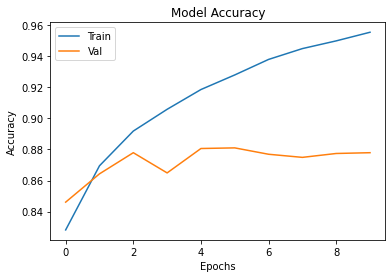

In [42]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

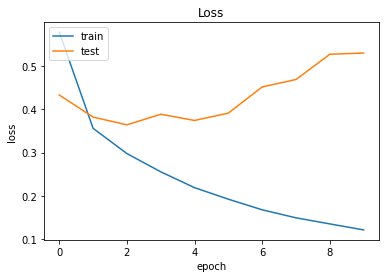

In [43]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Implementacja regresji liniowej

In [18]:
print(x.shape)
print(y.shape)

regresion_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x, y)

y_pred_regresion = regresion_model.predict(x_test_svc_to)

acc_regresion = accuracy_score(y_test_svc_to, y_pred_regresion, normalize=True)

(10000, 784)
(10000,)


In [19]:
print(acc_regresion)

0.794


Implementacja sieci z wykorzystaniem dropout

In [44]:
X_training = X_training.reshape(60000, 28, 28, 1)

In [48]:
model_drop = tf.keras.Sequential()
model_drop.add(tf.keras.layers.Conv2D(32, activation='relu', input_shape=(28,28,1), padding='same', kernel_size=(3,3)))
model_drop.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model_drop.add(tf.keras.layers.Dense(128, activation='relu'))
model_drop.add(tf.keras.layers.Dropout(0.1))
model_drop.add(tf.keras.layers.Dense(10, activation='softmax'))

Trenowanie modelu

In [49]:
model_drop.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])
model_drop_history = model_drop.fit(X_training, y_training_one_hot, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 52s 111ms/step - loss: 12.3346 - accuracy: 0.3251
Epoch 2/10
469/469 [==============================] - 52s 111ms/step - loss: 2.7057 - accuracy: 0.6518
Epoch 3/10
469/469 [==============================] - 54s 114ms/step - loss: 1.5158 - accuracy: 0.6982
Epoch 4/10
469/469 [==============================] - 53s 114ms/step - loss: 1.0655 - accuracy: 0.7236
Epoch 5/10
469/469 [==============================] - 53s 112ms/step - loss: 0.9006 - accuracy: 0.7432
Epoch 6/10
469/469 [==============================] - 53s 113ms/step - loss: 0.8065 - accuracy: 0.7592
Epoch 7/10
469/469 [==============================] - 54s 115ms/step - loss: 0.7315 - accuracy: 0.7780
Epoch 8/10
469/469 [==============================] - 53s 113ms/step - loss: 0.6926 - accuracy: 0.7830
Epoch 9/10
469/469 [==============================] - 55s 116ms/step - loss: 0.6521 - accuracy: 0.7935
Epoch 10/10
469/469 [==============================] - 54s 116ms/step - 

Analiza dokładności razem z wykresami

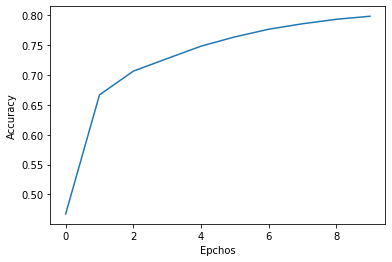

In [52]:
plt.plot(model_drop_history.history['accuracy'])
plt.xlabel('Epchos')
plt.ylabel('Accuracy')
plt.show()

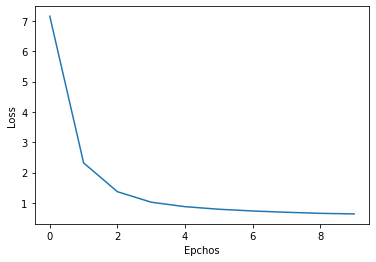

In [54]:
plt.plot(model_drop_history.history['loss'])
plt.xlabel('Epchos')
plt.ylabel('Loss')
plt.show()